In [ ]:
#Handwritten digits classification using CNN

#Here we can comapre results with ANN and CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape
# Means 60000 images and each image is 28/28 size

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

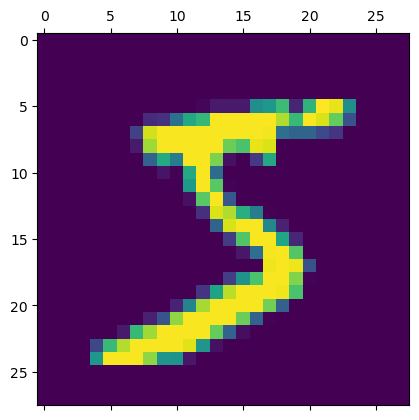

In [9]:
plt.matshow(X_train[0])
plt.show()

In [10]:
y_train[0]

5

In [11]:
#Since rgb values range frpm 0 to 255  we scale them
X_train = X_train / 255
X_test = X_test / 255

In [12]:
#Using ANN for classification

"""
Here we have 3 layers
first to flatten - The Flatten layer does not count as a neuron layer since it only reshapes the input.
second is the first dense layer
third is the output layer
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

D:\Programs\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8750 - loss: 0.4438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9630 - loss: 0.1285
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0818
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0636
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9856 - loss: 0.0487
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9882 - loss: 0.0384
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0313
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0262
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0218
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9946 - loss: 0.0187


In [13]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9709 - loss: 0.1087


[0.09047912806272507, 0.975600004196167]

In [16]:
"""
X_train = X_train.reshape(-1, 28, 28, 1)
reshapes the dataset X_train, changing its dimensions.

-1: This lets NumPy automatically determine the number of samples (it remains 60000).
28, 28: This keeps each image as a 28×28 grid (height × width).
1: This adds a channel dimension (for grayscale images).

Before and After Shape:
Before reshaping: (60000, 28, 28) → Each image is stored as a 2D array.
After reshaping: (60000, 28, 28, 1) → Now each image is stored as a 3D array with a single channel.

Many deep learning frameworks (like TensorFlow/Keras) expect image data in a 4D format:
(batch_size, height, width, channels)
If your images were RGB (colored), you’d have 3 channels ((60000, 28, 28, 3) for Red, Green, and Blue).
Since these are grayscale images, we use 1 channel.

In Convolutional Neural Networks (CNNs) (Conv2D layers in Keras), they require images in (height, width, channels) format.
"""

'\nX_train = X_train.reshape(-1, 28, 28, 1)\nreshapes the dataset X_train, changing its dimensions.\n\n-1: This lets NumPy automatically determine the number of samples (it remains 60000).\n28, 28: This keeps each image as a 28×28 grid (height × width).\n1: This adds a channel dimension (for grayscale images).\n\nBefore and After Shape:\nBefore reshaping: (60000, 28, 28) → Each image is stored as a 2D array.\nAfter reshaping: (60000, 28, 28, 1) → Now each image is stored as a 3D array with a single channel.\n\nMany deep learning frameworks (like TensorFlow/Keras) expect image data in a 4D format:\n(batch_size, height, width, channels)\nIf your images were RGB (colored), you’d have 3 channels ((60000, 28, 28, 3) for Red, Green, and Blue).\nSince these are grayscale images, we use 1 channel.\n\nIn Convolutional Neural Networks (CNNs) (Conv2D layers in Keras), they require images in (height, width, channels) format.\n'

In [14]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [17]:
#Using CNN for classification

"""
Conv2D(30, (3,3)):
This adds 30 filters (neurons), each of size 3×3.
Each filter slides over the input image and extracts features like edges, textures, or patterns.
activation='relu':
Applies the ReLU (Rectified Linear Unit) activation function, making the network more efficient in learning complex patterns.
input_shape=(28, 28, 1):
The input is a grayscale image of size 28×28 with 1 channel.

MaxPooling2D((2,2)):
Reduces the image size by taking the maximum value in every 2×2 region.
This helps reduce the number of parameters and prevents overfitting.
After Conv2D + MaxPooling, the output size is smaller but retains important features.

Converts the 2D feature maps into a 1D vector so they can be fed into the fully connected layers.

100 neurons with ReLU activation.
It learns complex patterns from the extracted features.

10 neurons, one for each output class (assuming a classification task with 10 categories 0 to 9
"""
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])



D:\Programs\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9040 - loss: 0.3165
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9822 - loss: 0.0579
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9885 - loss: 0.0382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9929 - loss: 0.0223
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9950 - loss: 0.0162


In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9836 - loss: 0.0550


[0.0465860553085804, 0.9861999750137329]

In [ ]:
"""
We can see that 
"""